# Modélisation des modèles pour une analyse de sentiments


Dans cette partie nous allons différents modèle pour sélectionner le modèle qui sera mis en production.


## Import des libraries


In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import gensim
import numpy as np
from gensim.models import Word2Vec
import time
from sklearn.tree import DecisionTreeClassifier
from gensim.models import KeyedVectors
import csv
from sklearn.decomposition import PCA
import lightgbm as lgb
from transformers import AutoTokenizer, AutoModel
import torch
from transformers import DistilBertTokenizer, DistilBertModel
from torch.utils.data import DataLoader, Dataset
import math
from tqdm import tqdm
from sklearn.decomposition import IncrementalPCA

/home/semoulolait/.conda/envs/projet_7/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Import du jeu de données


In [2]:
df_sentiment = pd.read_csv(
    "dataset/dataset_sentiment_clean.csv",
)

df_sentiment.head()

,target,ids,date,flag,user,text,sentiment,text_clean
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",Negative,switchfoot http twitpic com zl awww bummer sho...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,Negative,upset update facebook texting might cry result...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,Negative,kenichan dived many times ball managed save re...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,Negative,whole body feels itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",Negative,nationwideclass behaving mad see


In [3]:
df_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599517 entries, 0 to 1599516
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   target      1599517 non-null  int64 
 1   ids         1599517 non-null  int64 
 2   date        1599517 non-null  object
 3   flag        1599517 non-null  object
 4   user        1599517 non-null  object
 5   text        1599517 non-null  object
 6   sentiment   1599517 non-null  object
 7   text_clean  1599517 non-null  object
dtypes: int64(2), object(6)
memory usage: 97.6+ MB


## Approche classique (modèle simple) : TF1DF et Régression logistique


### Entrainement et Evaluation du modèle


In [3]:
# Prepare data for training
# define  features (X) and labels (y)
X = df_sentiment["text_clean"]
y = df_sentiment["target"]
# Transfor data to vector with TFIDF
vectorizer = TfidfVectorizer(max_features=5000)
X_vectorized = vectorizer.fit_transform(X)
# Divide data to train and test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_vectorized, y, test_size=0.2, random_state=42
)
print("Value counts for Train sentiments")
print(y_train.value_counts())
print("Value counts for Test sentiments")
print(y_test.value_counts())
# Train data with logistic regression
# Init and train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

Value counts for Train sentiments
target
0    640640
1    638973
Name: count, dtype: int64
Value counts for Test sentiments
target
1    160803
0    159101
Name: count, dtype: int64


LogisticRegression(max_iter=1000)

In [6]:
# Evaluation Model
# Predcit sentiment on test
target_label = ["Négatif", "Positif"]
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Report of performance
print(classification_report(y_test, y_pred, target_names=target_label))

Accuracy: 77.06%
              precision    recall  f1-score   support

     Négatif       0.78      0.75      0.76    159101
     Positif       0.76      0.79      0.78    160803

    accuracy                           0.77    319904
   macro avg       0.77      0.77      0.77    319904
weighted avg       0.77      0.77      0.77    319904



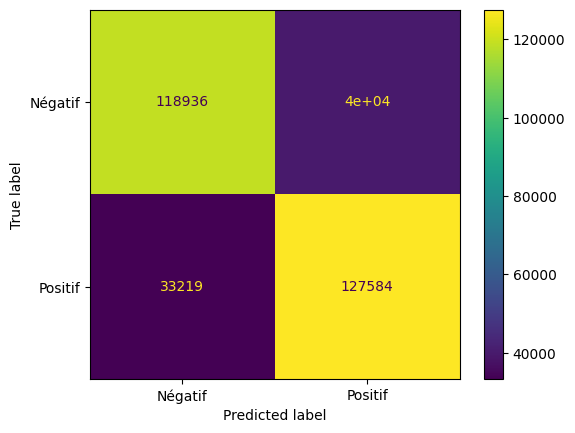

In [7]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=["Négatif", "Positif"]).plot()
plt.show()

## Approche classique (modèle simple) : TF1DF et random forest classifier


In [4]:
# Prepare data for training
# define  features (X) and labels (y)
X = df_sentiment["text_clean"]
y = df_sentiment["target"]
# Transfor data to vector with TFIDF
vectorizer = TfidfVectorizer(max_features=5000)
X_vectorized = vectorizer.fit_transform(X)
# Divide data to train and test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_vectorized, y, test_size=0.2, random_state=42
)
print("Value counts for Train sentiments")
print(y_train.value_counts())
print("Value counts for Test sentiments")
print(y_test.value_counts())
# Train data with logistic regression
# Init and train model
clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
clf.fit(X_train, y_train)

Value counts for Train sentiments
target
0    640640
1    638973
Name: count, dtype: int64
Value counts for Test sentiments
target
1    160803
0    159101
Name: count, dtype: int64


RandomForestClassifier(max_depth=10, random_state=42)

In [5]:
# Evaluation Model
# Predcit sentiment on test
target_label = ["Négatif", "Positif"]
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Report of performance
print(classification_report(y_test, y_pred, target_names=target_label))

Accuracy: 71.12%
              precision    recall  f1-score   support

     Négatif       0.75      0.63      0.69    159101
     Positif       0.68      0.79      0.73    160803

    accuracy                           0.71    319904
   macro avg       0.72      0.71      0.71    319904
weighted avg       0.72      0.71      0.71    319904



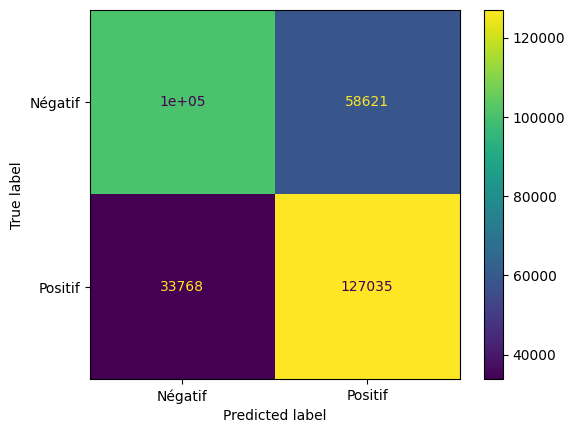

In [6]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=["Négatif", "Positif"]).plot()
plt.show()

## Approche classique (modèle simple) : TF1DF et xgboost


In [9]:
# Prepare data for training
# define  features (X) and labels (y)
X = df_sentiment["text_clean"]
y = df_sentiment["target"]
# Transfor data to vector with TFIDF
vectorizer = TfidfVectorizer(max_features=5000)
X_vectorized = vectorizer.fit_transform(X)
# Divide data to train and test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_vectorized, y, test_size=0.2, random_state=42
)
print("Value counts for Train sentiments")
print(y_train.value_counts())
print("Value counts for Test sentiments")
print(y_test.value_counts())
# Train data with logistic regression
# Init and train model
clf_lgbm = lgb.LGBMClassifier(
    num_leaves=31, max_depth=10, learning_rate=0.1, n_estimators=100, random_state=42
)

clf_lgbm.fit(X_train, y_train)

Value counts for Train sentiments
target
0    640640
1    638973
Name: count, dtype: int64
Value counts for Test sentiments
target
1    160803
0    159101
Name: count, dtype: int64
[LightGBM] [Info] Number of positive: 638973, number of negative: 640640
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 5.104709 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 259954
[LightGBM] [Info] Number of data points in the train set: 1279613, number of used features: 5000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499349 -> initscore=-0.002605
[LightGBM] [Info] Start training from score -0.002605


LGBMClassifier(max_depth=10, random_state=42)

In [10]:
# Evaluation Model
# Predcit sentiment on test
target_label = ["Négatif", "Positif"]
y_pred = clf_lgbm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Report of performance
print(classification_report(y_test, y_pred, target_names=target_label))

Accuracy: 72.15%
              precision    recall  f1-score   support

     Négatif       0.79      0.60      0.68    159101
     Positif       0.68      0.84      0.75    160803

    accuracy                           0.72    319904
   macro avg       0.73      0.72      0.72    319904
weighted avg       0.73      0.72      0.72    319904



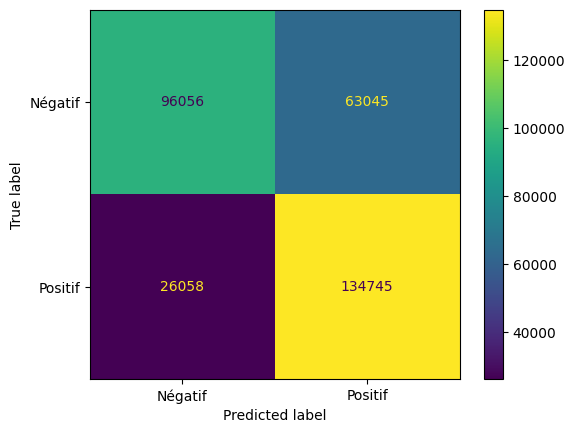

In [11]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=["Négatif", "Positif"]).plot()
plt.show()

## Approche avancée (modèle de type word embedding)


### Modèle Word2vec avec régression logistique


In [3]:
# Create a list for each sentence with each word
sentences = df_sentiment["text_clean"].to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

In [ ]:
sentences[0]

#### Entrainement du modèle


In [4]:
w2v_size = 300  #  Dimensionality of the word vectors.
w2v_window = (
    5  # Maximum distance between the current and predicted word within a sentence.
)
w2v_min_count = 1  # Ignores all words with total frequency lower than this.
w2v_epochs = 100  #  Number of iterations (epochs) over the corpus. (Formerly: iter)
maxlen = 100  # adapt to length of sentences

w2v_model = gensim.models.Word2Vec(
    min_count=w2v_min_count,
    window=w2v_window,
    vector_size=w2v_size,
    seed=42,  # Seed for the random number generator
    workers=1,
)  # Use these many worker threads to train the model (=faster training with multicore machines).
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")
w2v_model.save("word2vec_model.bin")

Vocabulary size: 608493
Word2Vec trained


#### Entrainement : classification de sentiment en utilisant les vecteurs word2vec et regression logistique


In [4]:
# Configuration
w2v_size = 300
reduced_size = 100  # Dimension réduite
w2v_model = KeyedVectors.load("word2vec_model.bin", mmap="r")


# FOnction for calculate means vector Word2vec
def compute_avg_word2vec(df, model, w2v_size):
    vectors = []
    for description in df["text_clean"]:
        words = description.split()
        word_vectors = [model.wv[word] for word in words if word in model.wv]
        if len(word_vectors) > 0:
            vectors.append(np.mean(word_vectors, axis=0))
        else:
            vectors.append(np.zeros(w2v_size))
    return np.array(vectors)


# Calcul vectors means function
avg_word2vec_vectors = compute_avg_word2vec(df_sentiment, w2v_model, w2v_size)

# apply PCA for reduce dimension
pca = PCA(n_components=reduced_size, random_state=42)
reduced_vectors = pca.fit_transform(avg_word2vec_vectors)

# Séparer les données en ensembles d'entraînement et de test
X = reduced_vectors
y = df_sentiment["target"].astype(np.int8)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#
print("Value counts for Train sentiments:")
print(y_train.value_counts())
print("Value counts for Test sentiments:")
print(y_test.value_counts())

# Init model logistic regression
log_reg_word2vec = LogisticRegression(max_iter=1000, random_state=42)

# Train model
start_time = time.time()
log_reg_word2vec.fit(X_train, y_train)
print(
    "Time taken to fit the model with word2vec vectors and logistic regression: "
    + str(time.time() - start_time)
)

FileNotFoundError: [Errno 2] No such file or directory: 'word2vec_model.bin.wv.vectors.npy'

##### Test du modèle


In [10]:
test_predictions_word2vec = log_reg_word2vec.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, test_predictions_word2vec)
print(f"Accuracy: {accuracy * 100:.2f}%")
# Afficher le rapport de classification
print(classification_report(y_test, test_predictions_word2vec))

Accuracy: 72.52%
              precision    recall  f1-score   support

           0       0.73      0.72      0.72    159101
           1       0.73      0.73      0.73    160803

    accuracy                           0.73    319904
   macro avg       0.73      0.73      0.73    319904
weighted avg       0.73      0.73      0.73    319904



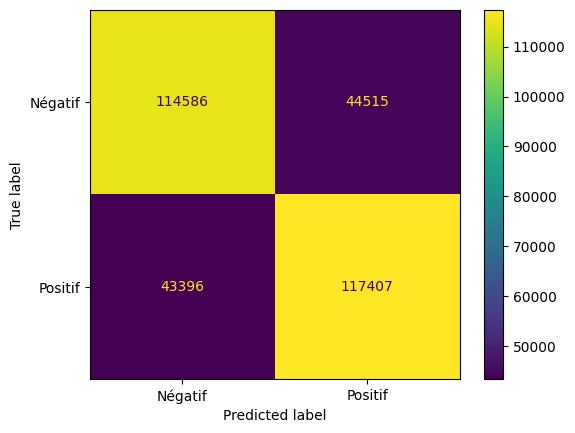

In [11]:
cm = confusion_matrix(y_test, test_predictions_word2vec)
ConfusionMatrixDisplay(cm, display_labels=["Négatif", "Positif"]).plot()
plt.show()

### Modèle Word2vec avec Random Forest Classifier


#### Entrainement : classification de sentiment en utilisant les vecteurs word2vec et Random Forest Classifier


In [1]:
# Configuration
w2v_size = 300
reduced_size = 100  # Dimension réduite
w2v_model = KeyedVectors.load("word2vec_model.bin", mmap="r")


# FOnction for calculate means vector Word2vec
def compute_avg_word2vec(df, model, w2v_size):
    vectors = []
    for description in df["text_clean"]:
        words = description.split()
        word_vectors = [model.wv[word] for word in words if word in model.wv]
        if len(word_vectors) > 0:
            vectors.append(np.mean(word_vectors, axis=0))
        else:
            vectors.append(np.zeros(w2v_size))
    return np.array(vectors)


# Calcul vectors means function
avg_word2vec_vectors = compute_avg_word2vec(df_sentiment, w2v_model, w2v_size)

# Appliquer PCA pour réduire les dimensions
pca = PCA(n_components=reduced_size, random_state=42)
reduced_vectors = pca.fit_transform(avg_word2vec_vectors)

# Séparer les données en ensembles d'entraînement et de test
X = reduced_vectors
y = df_sentiment["target"].astype(np.int8)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#
print("Value counts for Train sentiments:")
print(y_train.value_counts())
print("Value counts for Test sentiments:")
print(y_test.value_counts())

# Init model random forest classifier
rfc_word2vec = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train model
start_time = time.time()
rfc_word2vec.fit(X_train, y_train)
print(
    "Time taken to fit the model with word2vec vectors and logistic regression: "
    + str(time.time() - start_time)
)

NameError: name 'KeyedVectors' is not defined

##### Test du modèle


In [13]:
test_predictions_word2vec = rfc_word2vec.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, test_predictions_word2vec)
print(f"Accuracy: {accuracy * 100:.2f}%")
# Afficher le rapport de classification
print(classification_report(y_test, test_predictions_word2vec))

Accuracy: 70.69%
              precision    recall  f1-score   support

           0       0.70      0.71      0.71    159101
           1       0.71      0.71      0.71    160803

    accuracy                           0.71    319904
   macro avg       0.71      0.71      0.71    319904
weighted avg       0.71      0.71      0.71    319904



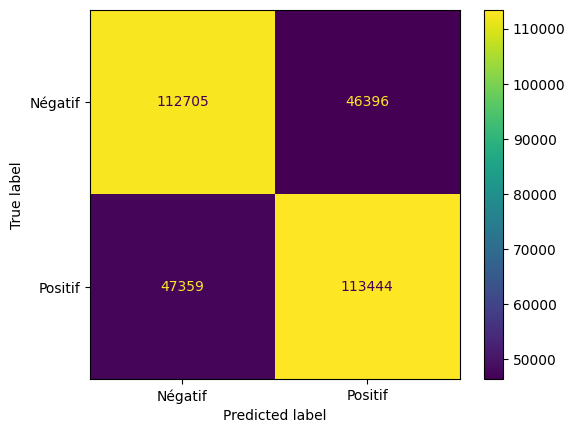

In [14]:
cm = confusion_matrix(y_test, test_predictions_word2vec)
ConfusionMatrixDisplay(cm, display_labels=["Négatif", "Positif"]).plot()
plt.show()

### Modèle Word2vec avec XGboost


#### Entrainement : classification de sentiment en utilisant les vecteurs word2vec et XGBOOST


In [5]:
# Configuration
w2v_size = 300
reduced_size = 100  # Dimension réduite
w2v_model = KeyedVectors.load("word2vec_model.bin", mmap="r")


# FOnction for calculate means vector Word2vec
def compute_avg_word2vec(df, model, w2v_size):
    vectors = []
    for description in df["text_clean"]:
        words = description.split()
        word_vectors = [model.wv[word] for word in words if word in model.wv]
        if len(word_vectors) > 0:
            vectors.append(np.mean(word_vectors, axis=0))
        else:
            vectors.append(np.zeros(w2v_size))
    return np.array(vectors)


# Calcul vectors means function
avg_word2vec_vectors = compute_avg_word2vec(df_sentiment, w2v_model, w2v_size)

# apply PCA for reduce dimension
pca = PCA(n_components=reduced_size, random_state=42)
reduced_vectors = pca.fit_transform(avg_word2vec_vectors)

# Séparer les données en ensembles d'entraînement et de test
X = reduced_vectors
y = df_sentiment["target"].astype(np.int8)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#
print("Value counts for Train sentiments:")
print(y_train.value_counts())
print("Value counts for Test sentiments:")
print(y_test.value_counts())

# Init model logistic regression
clf_lgbm_word2vec = lgb.LGBMClassifier(
    num_leaves=31, max_depth=10, learning_rate=0.1, n_estimators=100, random_state=42
)

# Train model
start_time = time.time()
clf_lgbm_word2vec.fit(X_train, y_train)
print(
    "Time taken to fit the model with word2vec vectors and XGBOOST: "
    + str(time.time() - start_time)
)

FileNotFoundError: [Errno 2] No such file or directory: 'word2vec_model.bin'

##### Test du modèle


In [5]:
test_predictions_word2vec = clf_lgbm_word2vec.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, test_predictions_word2vec)
print(f"Accuracy: {accuracy * 100:.2f}%")
# Afficher le rapport de classification
print(classification_report(y_test, test_predictions_word2vec))

Accuracy: 72.79%
              precision    recall  f1-score   support

           0       0.73      0.73      0.73    159101
           1       0.73      0.73      0.73    160803

    accuracy                           0.73    319904
   macro avg       0.73      0.73      0.73    319904
weighted avg       0.73      0.73      0.73    319904



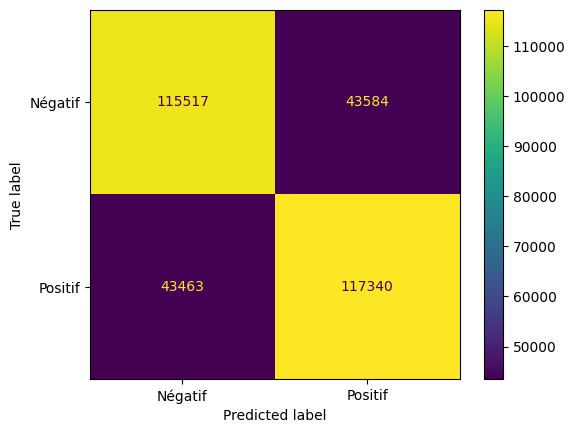

In [6]:
cm = confusion_matrix(y_test, test_predictions_word2vec)
ConfusionMatrixDisplay(cm, display_labels=["Négatif", "Positif"]).plot()
plt.show()

### Modèle Glove avec régression logistique


In [3]:
def load_glove_model(glove_file):
    print("Loading GloVe model...")
    glove_model = {}
    with open(glove_file, "r", encoding="utf-8") as file:
        for line in file:
            split_line = line.split()
            word = split_line[0]
            vector = np.array(split_line[1:], dtype="float32")
            glove_model[word] = vector
    print(f"Loaded {len(glove_model)} words.")
    return glove_model


# Load Glove model
glove_model = load_glove_model("model/glove.6B.300d.txt")

Loading GloVe model...
Loaded 400000 words.


In [5]:
def compute_avg_glove_vector(texts, glove_model, vector_size):
    """Compute the average GloVe vector for a list of texts."""
    vectors = []
    for text in texts:
        words = text.split()
        word_vectors = [glove_model[word] for word in words if word in glove_model]
        if len(word_vectors) > 0:
            vectors.append(np.mean(word_vectors, axis=0))
        else:
            vectors.append(np.zeros(vector_size))
    return np.array(vectors)


glove_size = 300

# Calculer les vecteurs GloVe moyens pour chaque texte
X = compute_avg_glove_vector(df_sentiment["text_clean"], glove_model, glove_size)
y = df_sentiment["target"]

# Réduire les dimensions avec PCA
reduced_size = 100  # Réduire à 100 dimensions
pca = PCA(n_components=reduced_size, random_state=42)
X_reduced = pca.fit_transform(X)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42
)

# Initialiser et entraîner le modèle
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Prédire sur les données de test
y_pred = log_reg.predict(X_test)

# Afficher les résultats
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 70.55%
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.70      0.70    159101
           1       0.70      0.72      0.71    160803

    accuracy                           0.71    319904
   macro avg       0.71      0.71      0.71    319904
weighted avg       0.71      0.71      0.71    319904



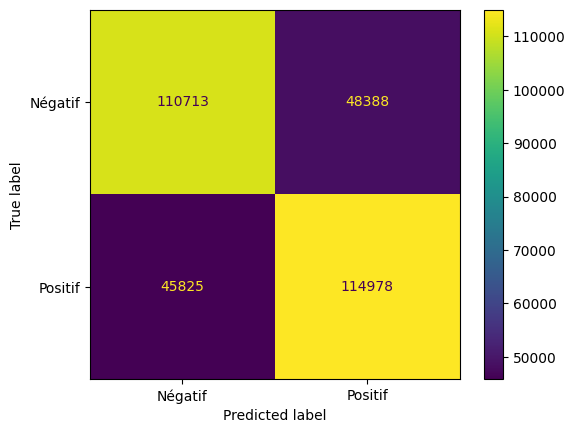

In [7]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=["Négatif", "Positif"]).plot()
plt.show()

### Modèle Glove avec random classifier


In [4]:
def compute_avg_glove_vector(texts, glove_model, vector_size):
    """Compute the average GloVe vector for a list of texts."""
    vectors = []
    for text in texts:
        words = text.split()
        word_vectors = [glove_model[word] for word in words if word in glove_model]
        if len(word_vectors) > 0:
            vectors.append(np.mean(word_vectors, axis=0))
        else:
            vectors.append(np.zeros(vector_size))
    return np.array(vectors)


glove_size = 300

# Calculer les vecteurs GloVe moyens pour chaque texte
X = compute_avg_glove_vector(df_sentiment["text_clean"], glove_model, glove_size)
y = df_sentiment["target"]

# Réduire les dimensions avec PCA
reduced_size = 100  # Réduire à 100 dimensions
pca = PCA(n_components=reduced_size, random_state=42)
X_reduced = pca.fit_transform(X)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42
)

# Init model random forest classifier
rcf_glove = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rcf_glove.fit(X_train, y_train)

# Prédire sur les données de test
y_pred = rcf_glove.predict(X_test)

# Afficher les résultats
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 68.84%
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.71      0.69    159101
           1       0.70      0.67      0.68    160803

    accuracy                           0.69    319904
   macro avg       0.69      0.69      0.69    319904
weighted avg       0.69      0.69      0.69    319904



### Modèle Glove avec XGBOOST


In [4]:
def compute_avg_glove_vector(texts, glove_model, vector_size):
    """Compute the average GloVe vector for a list of texts."""
    vectors = []
    for text in texts:
        words = text.split()
        word_vectors = [glove_model[word] for word in words if word in glove_model]
        if len(word_vectors) > 0:
            vectors.append(np.mean(word_vectors, axis=0))
        else:
            vectors.append(np.zeros(vector_size))
    return np.array(vectors)


glove_size = 300

# Calculer les vecteurs GloVe moyens pour chaque texte
X = compute_avg_glove_vector(df_sentiment["text_clean"], glove_model, glove_size)
y = df_sentiment["target"]

# Réduire les dimensions avec PCA
reduced_size = 100  # Réduire à 100 dimensions
pca = PCA(n_components=reduced_size, random_state=42)
X_reduced = pca.fit_transform(X)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42
)

# Init model random forest classifier
glove_xgboost = clf_lgbm_word2vec = lgb.LGBMClassifier(
    num_leaves=31, max_depth=10, learning_rate=0.1, n_estimators=100, random_state=42
)
glove_xgboost.fit(X_train, y_train)

# Prédire sur les données de test
y_pred = glove_xgboost.predict(X_test)

# Afficher les résultats
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))

[LightGBM] [Info] Number of positive: 638973, number of negative: 640640
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.174295 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 1279613, number of used features: 100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499349 -> initscore=-0.002605
[LightGBM] [Info] Start training from score -0.002605
Accuracy: 71.05%
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71    159101
           1       0.71      0.71      0.71    160803

    accuracy                           0.71    319904
   macro avg       0.71      0.71      0.71    319904
weighted avg       0.71      0.71      0.71    319904



### Modèle DistilBERT avec régression logistique


In [3]:
# Set device for computations
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the dataset
df_sentiment = pd.read_csv("dataset/dataset_sentiment_clean.csv")

# Load distilbert tokenizer and model
distilbert_model_name = "distilbert-base-uncased"
tokenizer = DistilBertTokenizer.from_pretrained(distilbert_model_name)
model = DistilBertModel.from_pretrained(distilbert_model_name).to(device)


# Function to compute embeddings with progress tracking
def get_distilbert_embeddings(texts, batch_size=10, max_len=128):
    """
    Returns mean vector for the last hidden layer from the distilbert model.

    Args:
        texts: list[str] - List of sentences/paragraphs
        batch_size: int - Number of sentences in a single batch

    Returns:
        torch.tensor -- Embedding for each sentence/paragraph in texts
    """
    model.eval()
    num_buckets = math.ceil(len(texts) / batch_size)
    vectors = []

    with torch.no_grad():
        # Wrap bucket processing with tqdm for progress tracking
        for bucket in tqdm(
            np.array_split(texts, num_buckets), desc="Computing distilbert Embeddings"
        ):
            tokens = tokenizer(
                bucket.tolist(),
                return_tensors="pt",
                padding=True,
                truncation=True,
                max_length=max_len,
            ).to(device)
            embeddings = model(**tokens).last_hidden_state.mean(dim=1).detach().cpu()
            vectors.append(embeddings)

    return torch.cat(vectors)


# Compute embeddings with progress bar
print("Computing distilbert embeddings in batches...")
bert_embeddings = get_distilbert_embeddings(
    df_sentiment["text_clean"].tolist(), batch_size=8
)
# Reduce dimensions using PCA
print("Reducing dimensions using PCA...")
reduced_size = 100
incremental_pca = IncrementalPCA(n_components=100, batch_size=32)
X_reduced = incremental_pca.fit_transform(bert_embeddings)

# Prepare data for training and testing
y = df_sentiment["target"].astype(np.int8)
X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42
)

# Train Logistic Regression
print("Training Logistic Regression...")
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Evaluate the model
print("Evaluating the model...")
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_rep)

Computing distilbert embeddings in batches...


Computing distilbert Embeddings:   0%|          | 802/199940 [00:04<18:19, 181.19it/s]


KeyboardInterrupt: 